In [1]:
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

print("procesando...")
# Directorio que contiene las imágenes
image_dir = 'C:/Users/leoch/Desktop/heidi proyecto/imagenes/'

# Obtener la lista de nombres de archivo de imágenes en el directorio
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir)]

# Función para obtener la etiqueta a partir del nombre del archivo
def get_label(file_path):
    # Obtiene el nombre de la imagen (sin la ruta)
    file_name = tf.strings.split(file_path, os.path.sep)[-1]
    # Buscar números entre paréntesis en el nombre de archivo
    match = tf.strings.regex_full_match(file_name, r".*\((1)\).*")
    # Si hay un número entre paréntesis, devolver un vector one-hot
    if match:
        label = 1  # Clase 1: cascabel
    else:
        label = 0  # Clase 0: otros
    return label


# Convertir los nombres de archivo a cadenas de texto
image_files = tf.constant(image_files)

def load_and_preprocess_image(file_path, label):
    file_path = tf.strings.reduce_join(file_path, separator="")
    # Leer el archivo de imagen
    image = tf.io.read_file(file_path)
    # Decodificar la imagen (JPEG o PNG)
    try:
        image = tf.image.decode_jpeg(image, channels=3)
    except tf.errors.InvalidArgumentError:
        try:
            image = tf.image.decode_png(image, channels=3)
        except tf.errors.InvalidArgumentError:
            # Si el archivo no es JPEG ni PNG, establecer una imagen vacía
            image = tf.zeros([224, 224, 3], dtype=tf.float32)
        else:
            # Redimensionar y normalizar la imagen si se decodificó correctamente
            image = tf.image.resize(image, [224, 224])
            image = tf.cast(image, tf.float32) / 255.0
    else:
        # Redimensionar y normalizar la imagen si se decodificó correctamente
        image = tf.image.resize(image, [224, 224])
        image = tf.cast(image, tf.float32) / 255.0
    
    return image, label
    
# Crear un conjunto de datos a partir de las rutas de archivo y las etiquetas obtenidas
dataset = tf.data.Dataset.from_tensor_slices((
    [file.numpy().decode('utf-8') for file in image_files], 
    [get_label(file) for file in image_files]
))


# Aplicar la función de carga y preprocesamiento a cada elemento del conjunto de datos
dataset = dataset.map(lambda x, y: (tf.py_function(load_and_preprocess_image, [x, y], [tf.float32, tf.int32])))

X = []  # Arreglo para almacenar las imágenes
Y = []  # Arreglo para almacenar las etiquetas

# Iterar sobre el conjunto de datos y agregar los elementos a los arreglos X y Y
for image, label in dataset:
    X.append(image)
    Y.append(label)
    
X = np.array(X)
Y = np.array(Y)
print("preprocesamiento de imagenes completado")

procesando...
preprocesamiento de imagenes completado


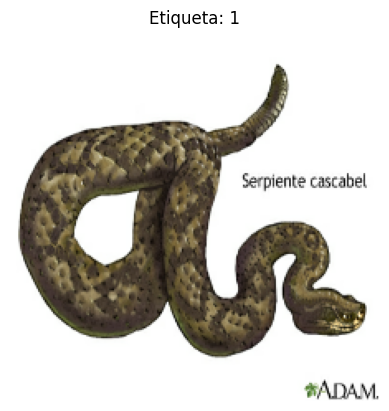

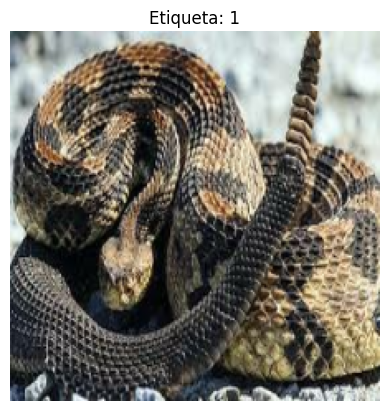

In [2]:
import matplotlib.pyplot as plt

# Filtrar el conjunto de datos para obtener solo las imágenes con etiqueta 1
dataset_label_1 = dataset.filter(lambda x, y: tf.equal(y, 1))

# Iterar sobre el conjunto de datos filtrado y mostrar algunas imágenes con etiqueta 1
for image, label in dataset_label_1.take(2):  # Tomar solo 2 ejemplos para mostrar
    # Mostrar la imagen
    plt.imshow(image.numpy())
    plt.title('Etiqueta: {}'.format(label.numpy()))
    plt.axis('off')
    plt.show()

In [160]:
len(dataset)

188

In [29]:
# creamos los modelos
print("creando modelo..")

# Crear una capa de entrada explícita
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))

modeloRNC2 = tf.keras.models.Sequential([
    input_layer,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),  # No especificar input_shape aquí
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

print("completado")

creando modelo..
completado


In [30]:
print("compilando..")
modeloRNC2.compile(optimizer = 'adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
print("listo para entrenar")

compilando..
listo para entrenar


In [31]:
# Convertir las listas de Python a tensores de TensorFlow
X_tensor = tf.convert_to_tensor(X)
Y_tensor = tf.convert_to_tensor(Y)

# Definir el número de épocas y el tamaño del lote
num_epochs = 15
batch_size = 32

# Crear un conjunto de datos a partir de los tensores
train_dataset = tf.data.Dataset.from_tensor_slices((X_tensor, Y_tensor)).shuffle(len(X)).batch(batch_size)

# Entrenar el modelo
historial= modeloRNC2.fit(train_dataset, epochs=num_epochs)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 410ms/step - accuracy: 0.5068 - loss: 0.8295
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - accuracy: 0.6387 - loss: 0.6385
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - accuracy: 0.7305 - loss: 0.5311
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 394ms/step - accuracy: 0.7380 - loss: 0.4987
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - accuracy: 0.7605 - loss: 0.4103
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - accuracy: 0.7922 - loss: 0.4069
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 413ms/step - accuracy: 0.8798 - loss: 0.2934
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 426ms/step - accuracy: 0.9475 - loss: 0.2013
Epoch 9/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 422ms/step - accuracy: 0.9498 - loss: 0.1556
Epoch 10/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 431ms/step - accuracy: 0.9364 - loss: 0.1440
Epoch 11/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 430ms/step - accuracy: 0.9727 - loss: 0.1035
Epoch 12/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 438ms/step - accuracy: 0.9595 - lo

In [32]:
train_loss, train_accuracy = modeloRNC2.evaluate(train_dataset)

# Imprimir la pérdida y la precisión del conjunto de datos de entrenamiento
print('Pérdida en el conjunto de datos de entrenamiento:', train_loss)
print('Precisión en el conjunto de datos de entrenamiento:', train_accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.9256 - loss: 0.1842
Pérdida en el conjunto de datos de entrenamiento: 0.14974623918533325
Precisión en el conjunto de datos de entrenamiento: 0.9468085169792175


In [33]:
print(modeloRNC2.output.name)

ValueError: The layer sequential_2 has never been called and thus has no defined output.

In [37]:
modeloRNC2.save('keras_model2.h5')

NameError: name 'no' is not defined

In [35]:
!tensorflowjs_converter --input_format=keras keras_model2.h5 output

2024-04-29 18:20:12.268827: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-29 18:20:13.049061: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
C:\Users\leoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflowjs\read_weights.py:28: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.uint8, np.uint16, np.object, np.bool]
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\leoch\AppData\